In [42]:
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import sys

In [74]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [75]:
def fun(x,y):
        logx = np.log10(x)
        logy = np.log10(y)
        if logy > logx - 0.3 and logy < logx + 0.3: return 1
        else: return 0

raw evaluation profile for kp


Text(0.5, 1.0, 'Likelihood ratio test')

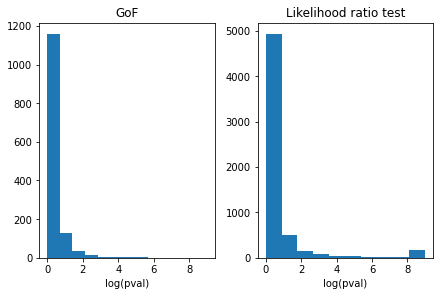

In [115]:
kpe_var_in  = '/mnt/pan/Data14/1kgp/NA12878/NA12878_pb.var'
kpe_eval_in = '/mnt/pan/Data14/1kgp/NA12878/NA12878_pb.eval'
prefix      = 'NA12878_pb'

kpe_var_all  = pd.read_csv(kpe_var_in, header=0, index_col=0)
kpe_eval_all = pd.read_csv(kpe_eval_in, header=0, index_col=0)

print('raw evaluation profile for kp')
kpe_eval_all[['sim_kon','sim_koff','sim_ksyn','chisq_pval','simlr_pval']].head(5)
fig, ax = plt.subplots(ncols=2, sharex=True,constrained_layout=True)
ax[0].hist(-kpe_eval_all['chisq_pval'].dropna().transform(np.log10))
ax[0].set_xlabel('log(pval)')
ax[0].set_title('GoF')

kpe_eval_all['simlr_pval'] += 10e-10
ax[1].hist(-kpe_eval_all['simlr_pval'].dropna().transform(np.log10))
ax[1].set_xlabel('log(pval)')
ax[1].set_title('Likelihood ratio test')

In [46]:
# process evaluation file
org_cols = ['kon','koff','ksyn']
sim_cols = ['sim_' + x for x in ori_cols ]
log_cols = ['log(kon)','log(koff)','log(ksyn)']

for i, (kp1,kp2) in enumerate(zip(ori_cols, sim_cols)):
    new_col = 'col' + str(i)
    kpe_eval_all[new_col] = kpe_eval_all.apply(lambda row: fun(row[kp1],  row[kp2]),  axis=1)
kpe_eval_all['col']  = kpe_eval_all.apply(lambda row: row['col0']*row['col1']*row['col2'], axis=1)

print_cols = org_cols+sim_cols+['chisq_pval','simlr_pval']
# filter criterion1
print('criterion1 for kp')
select1 = (kpe_eval_all['col']==1)
kpe_eval_all.loc[select1, print_cols].head(2)

criterion1 for kp


,kon,koff,ksyn,sim_kon,sim_koff,sim_ksyn,chisq_pval,simlr_pval
ENSG00000001036-6:143495722_C,79.92265,650.16494,1.00000,92.387494,670.704185,1.002763,NaN,0.081249
ENSG00000001036-6:143495722_T,0.04626,504.11474,41.73524,0.061303,546.762877,32.433926,NaN,0.874804


In [47]:
# filter criterion2
print('\n criterion2 for stat')
select2 = (kpe_eval_all['chisq_pval'] > 0.05)|(kpe_eval_all['simlr_pval'] > 0.05)
kpe_eval_all.loc[select2, print_cols].tail(2)


 criterion2 for stat


,kon,koff,ksyn,sim_kon,sim_koff,sim_ksyn,chisq_pval,simlr_pval
ENSG00000285012-16:85988021_G,3.02212,129.10250,1.0,1.436768,118.177733,2.161350,NaN,0.372352
ENSG00000285053-1:235448904_T,3.23195,91.05802,1.0,1.143843,91.233520,2.835821,NaN,0.542749


In [84]:
kpe_eval_all['consist']  = (select1) & (select2)
print('\n example that meet criterion2 but not criterion1')
kpe_eval_all.loc[select2 & (~select1), print_cols].head(2)


 example that meet criterion2 but not criterion1


,kon,koff,ksyn,sim_kon,sim_koff,sim_ksyn,chisq_pval,simlr_pval
ENSG00000001630-7:92113836_A,20.90133,820.21666,1.00000,3.104869,124.901813,1.001053,NaN,0.921045
ENSG00000002330-11:64271703_G,9.03421,695.10074,50.36916,3.487917,1.930615,1.000000,0.740579,0.080923


In [85]:
kpe_eval = kpe_eval_all[kpe_eval_all['consist']==1]
print("# allele being evaluated:",len(kpe_eval_all))
print("# allele after filtering:",len(kpe_eval))
print("% allele after filtering:",len(kpe_eval)/len(kpe_eval_all))

# allele being evaluated: 7590
# allele after filtering: 3161
% allele after filtering: 0.41646903820816866


In [86]:
print('example for filtered evaluation profile')
kpe_eval[print_cols].head(5)

example for filtered evaluation profile


,kon,koff,ksyn,sim_kon,sim_koff,sim_ksyn,chisq_pval,simlr_pval
ENSG00000001036-6:143495722_C,79.92265,650.16494,1.00000,92.387494,670.704185,1.002763,NaN,0.081249
ENSG00000001036-6:143495722_T,0.04626,504.11474,41.73524,0.061303,546.762877,32.433926,NaN,0.874804
ENSG00000002330-11:64271703_A,0.05849,1.58059,2.31422,0.067881,1.863170,2.300182,NaN,0.714943
ENSG00000003400-2:201185954_G,0.16203,415.18852,17.00277,0.127804,428.347385,17.969864,NaN,0.708604
ENSG00000003402-2:201171512_T,0.03926,5.36711,16.64867,0.039434,4.779163,15.355188,NaN,0.929810


In [87]:
# filter variance profile
var_cols = ['kon_mean','koff_mean','ksyn_mean',\
            'kon_low','kon_upper','koff_low','koff_upper','ksyn_low','ksyn_upper']
print('raw variance profile')
kpe_var_all[var_cols].head(5)

raw variance profile


,kon_mean,koff_mean,ksyn_mean,kon_low,kon_upper,koff_low,koff_upper,ksyn_low,ksyn_upper
ENSG00000092470-15:43828361_T,0.40377,43.11388,13.27623,0.36906,0.44051,39.48824,47.08815,12.15940,14.53959
ENSG00000092470-15:43828361_G,0.01802,349.92236,250.20213,0.01397,0.02277,271.82765,458.62504,184.56499,325.55028
ENSG00000092621-1:119727368_C,0.35000,35.96011,21.50917,0.32466,0.37639,33.25150,38.67470,19.85102,23.19831
ENSG00000092621-1:119727368_G,0.02586,6.71337,17.51572,0.02225,0.02956,5.60320,7.99860,14.65503,21.07390
ENSG00000092758-20:62841034_A,1.59692,136.94922,1.84521,1.32134,1.90052,114.95352,164.74464,1.53839,2.20750


In [117]:
for kp in org_cols:
    mean = kp + '_mean'
    lower = kp + '_low'
    upper = kp + '_upper'
    ci = kp + '_ci'

    select = (kpe_var_all[mean] > kpe_var_all[lower]) & (kpe_var_all[mean] < kpe_var_all[upper])
    kpe_var_all.loc[select,ci] = ( kpe_var_all.loc[select,upper] - kpe_var_all.loc[select,lower] )/ kpe_var_all.loc[select,mean]

(5127, 18)


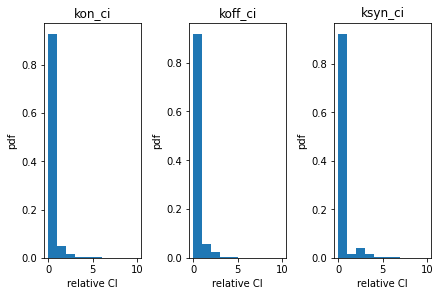

In [118]:
fig, ax = plt.subplots(ncols=3, constrained_layout=True)
ci_cols = [ x + '_ci' for x in org_cols ]
for ikp, ci_kp in enumerate(ci_cols):
    ax[ikp].set_xlabel('relative CI')
    ax[ikp].set_ylabel('pdf')
    ax[ikp].set_title(ci_kp)
    ax[ikp].hist(kpe_var_all[ci_kp], range=(0,10), density=True)
kpe_var_all.dropna(inplace=True)
kpe_var_all.head(5)
print(kpe_var_all.shape)

In [119]:
select = (kpe_var_all[ci_cols] <= 2)
stat = np.sum(select, axis=1)

kpe_var = kpe_var_all[stat > 2]
print(len(kpe_var))
print(len(kpe_var_all))
print(len(kpe_var)/len(kpe_var_all))

4775
5127
0.931343865808465


In [120]:
kpe_var.head(10)

,kon,koff,ksyn,n,mean,var,kon_mean,koff_mean,ksyn_mean,kon_low,kon_upper,koff_low,koff_upper,ksyn_low,ksyn_upper,kon_ci,koff_ci,ksyn_ci
ENSG00000092470-15:43828361_T,0.40434,43.04564,13.29118,5354,0.12365,0.16663,0.40377,43.11388,13.27623,0.36906,0.44051,39.48824,47.08815,12.15940,14.53959,0.176957,0.176275,0.179282
ENSG00000092470-15:43828361_G,0.02105,333.87382,278.08772,5354,0.01606,0.02813,0.01802,349.92236,250.20213,0.01397,0.02277,271.82765,458.62504,184.56499,325.55028,0.488346,0.533825,0.563486
ENSG00000092621-1:119727368_C,0.34977,35.77759,21.49919,5354,0.20751,0.39755,0.35000,35.96011,21.50917,0.32466,0.37639,33.25150,38.67470,19.85102,23.19831,0.147800,0.150812,0.155622
ENSG00000092621-1:119727368_G,0.02600,6.76921,17.71488,5354,0.06761,0.22068,0.02586,6.71337,17.51572,0.02225,0.02956,5.60320,7.99860,14.65503,21.07390,0.282676,0.356810,0.366463
ENSG00000092758-20:62841034_A,1.62017,138.11542,1.86864,5354,0.02167,0.02194,1.59692,136.94922,1.84521,1.32134,1.90052,114.95352,164.74464,1.53839,2.20750,0.362686,0.363574,0.362620
ENSG00000092820-6:158766299_A,6.77421,221.00083,33.14837,5354,0.98581,1.19218,6.76558,220.91110,33.17844,6.54875,6.99681,213.91756,229.25690,32.15706,34.20586,0.066226,0.069437,0.061751
ENSG00000092820-6:158766299_C,0.13551,1.06156,3.11074,5354,0.35226,0.79747,0.13503,1.06071,3.11641,0.12650,0.14458,0.98521,1.14733,2.90874,3.34222,0.133896,0.152841,0.139096
ENSG00000092871-17:35011428_C,4.20908,38.23028,1.00000,5354,0.09918,0.10130,4.19096,38.26609,0.99979,3.77690,4.64181,34.75581,42.47116,0.91320,1.08802,0.206375,0.201624,0.174857
ENSG00000092964-8:26657942_T,0.70511,48.45172,5.50813,5354,0.07901,0.08883,0.70260,48.39388,5.49498,0.63317,0.77716,43.49323,53.71287,4.94783,6.08651,0.204939,0.211176,0.207222
ENSG00000092978-1:217430782_T,70.97781,297.28856,1.00300,5354,0.19331,0.19143,71.15085,296.91486,1.00376,65.70195,76.70765,274.67181,322.77768,0.93739,1.06874,0.154681,0.162019,0.130858


In [122]:
shared_allele = set(kpe_eval.index.tolist()).intersection(kpe_var.index.tolist())
print("# shared allele in eval", len(shared_allele))
print("% shared allele in eval", len(shared_allele)/len(kpe_eval))
print("% shared allele in var", len(shared_allele)/len(kpe_var))

# shared allele in eval 2389
% shared allele in eval 0.755773489402088
% shared allele in var 0.5003141361256545


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


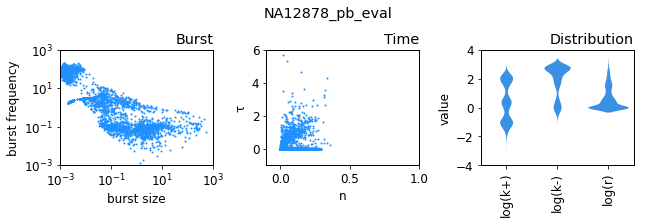

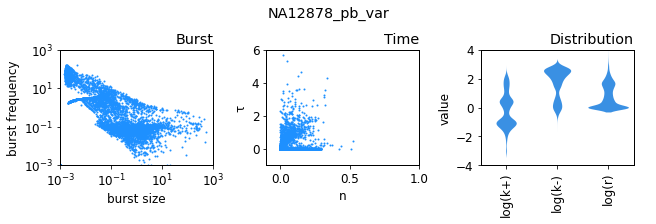

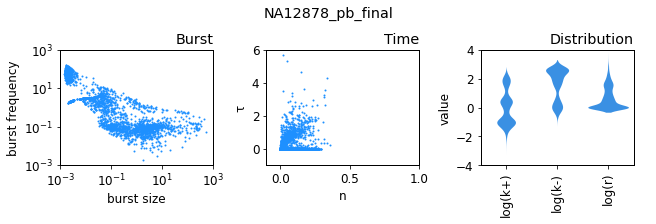

In [124]:
from lib.pca_hist import pca_plot

kpe_var[log_cols] = kpe_var[ori_cols].transform(np.log10)
kpe_var['burst size']  = kpe_var['ksyn']/kpe_var['koff']
kpe_var['burst frequency']  = kpe_var['kon'] * kpe_var['koff'] /(kpe_var['kon'] + kpe_var['koff'])
kpe_var['n'] = kpe_var['kon']/(kpe_var['kon']+kpe_var['koff'])
kpe_var['τ']   = 1/(kpe_var['kon']+kpe_var['koff'])

kpe_eval[log_cols] = kpe_eval[ori_cols].transform(np.log10)
kpe_eval['burst size']  = kpe_eval['ksyn']/kpe_eval['koff']
kpe_eval['burst frequency']  = kpe_eval['kon'] * kpe_eval['koff'] /(kpe_eval['kon'] + kpe_eval['koff'])
kpe_eval['n'] = kpe_eval['kon']/(kpe_eval['kon']+kpe_eval['koff'])
kpe_eval['τ']   = 1/(kpe_eval['kon']+kpe_eval['koff'])

pca_plot(kpe_eval,prefix+'_eval')
pca_plot(kpe_var, prefix+'_var')
pca_plot(kpe_var.loc[shared_allele], prefix+'_final')


In [22]:
kpe_var.loc[shared_allele].head(10)
# kpe_var.to_csv(prefix+'.est.consist)

,kon,koff,ksyn,n,mean,var,kon_mean,koff_mean,ksyn_mean,kon_low,kon_upper,koff_low,koff_upper,ksyn_low,ksyn_upper,kon_ci,koff_ci,ksyn_ci
ENSG00000166226-12:69592794_A,0.06030,1.09868,5.26100,5354,0.27363,0.90328,0.06021,1.09928,5.25993,0.05533,0.06521,0.99114,1.22436,4.81564,5.72094,0.164092,0.212157,-2.538576
ENSG00000010671-X:101349769_G,0.16912,1.68170,1.76192,5354,0.16100,0.25125,0.16890,1.67669,1.76283,0.15485,0.18357,1.52333,1.84567,1.61455,1.92260,0.170041,0.192248,-2.516657
ENSG00000157216-1:54225792_T,0.07271,335.49905,42.61914,5354,0.00934,0.01075,0.06940,326.16742,40.99194,0.05206,0.09091,251.45372,437.60823,30.29766,55.31826,0.559798,0.570733,-0.712224
ENSG00000107372-9:72354666_G,0.12766,250.32041,24.27077,5354,0.01438,0.01866,0.13719,213.19639,27.45651,0.10664,0.17010,171.03411,269.47001,21.47686,34.30433,0.462570,0.461715,-1.097912
ENSG00000153029-1:181058033_T,141.21463,483.05017,1.00000,5354,0.22619,0.20379,141.22891,482.50665,0.99970,130.51560,152.43181,446.40648,520.66895,0.94206,1.05760,0.155182,0.153910,-3.113103
ENSG00000178445-9:6532544_G,2.07007,25.98838,2.29116,5354,0.16903,0.18267,2.07066,25.93347,2.29011,1.91314,2.22983,24.08102,28.03756,2.13348,2.45323,0.152942,0.152565,-2.840401
ENSG00000180953-15:79899001_G,3.65355,47.75786,1.00000,5354,0.07097,0.07154,3.63285,47.74394,0.99577,3.25296,4.06372,43.14555,53.21692,0.89415,1.10524,0.223175,0.210946,-2.237954
ENSG00000015133-14:91378789_G,0.11074,176.50586,47.35466,5354,0.02970,0.03666,0.10967,175.72840,47.07803,0.09152,0.12871,147.75358,210.33428,39.40334,55.78713,0.339108,0.356122,-1.522785
ENSG00000100711-14:103733243_C,0.10838,265.20779,32.25514,5354,0.01345,0.01551,0.10563,256.75551,32.10406,0.08121,0.13123,202.96410,333.32124,25.05330,41.02726,0.473540,0.507709,-1.007034
ENSG00000111229-12:110442808_T,0.08997,0.18884,11.28241,5354,3.75233,27.16055,0.09002,0.18886,11.28201,0.08574,0.09430,0.17813,0.19947,11.03890,11.54144,0.095090,0.112994,-4.488642


In [52]:
from lib.combine import compare

kpe_in1 = '/mnt/pan/Data14/1kgp/NA12878/NA12878_pb.est.consist'
label1 = 'pb'
kpe_in2 = '/mnt/pan/Data14/1kgp/NA12878/NA12878_full.est.consist'
label2 = 'full'

kpe_df1 = pd.read_csv(kpe_in1,header=0, index_col=0)
kpe_df2 = pd.read_csv(kpe_in2,header=0, index_col=0)
compare(kpe_df1, kpe_df2, label1, label2)

2    0.024324
1    0.027027
3    0.948649
Name: col, dtype: float64
